In [1]:
from astropy.table import Table
import numpy as np
lens_samples = Table.read('lens_samples.fits')
mask_stack = lens_samples['if_obs_stack'].data
mask_single = lens_samples['if_obs_single'].data
stack_samples = lens_samples[mask_stack]
single_samples = lens_samples[mask_single]
stack_samples.sort('SNR_stack')
single_samples.sort('SNR_stack')
print(np.count_nonzero(mask_stack), np.count_nonzero(mask_single))

99679 49375


In [2]:
single_samples[0:5]

<Table length=5>
    thetaE_s0           mass_s0         z_s0         re_s0               q_s0              pa_s0        ... best_band         mu        if_ring if_obs_stack if_obs_single noise_seed
     float64            float64       float64       float64            float64            float64       ...   bytes1       float64        bool      bool          bool       int64   
------------------ ------------------ ------- ------------------- ------------------ ------------------ ... --------- ----------------- ------- ------------ ------------- ----------
0.9795789041456473 222826960579.21725  0.6224  0.1662283535763499 0.5768785168499198  138.7963244703537 ...         g 7.519636670193834   False        False          True       1656
0.2758946899116038 24509514906.217117  0.6224 0.16357176452250397 0.8802123128951199 62.912206454751896 ...         g 4.227095078264525    True        False          True        268
  0.30812183222492  25309947577.15703  0.2703 0.10596264555195578 0.6567249158526935 149.32199388432917 ...         g 3.976425903567094    True         True          True       3485
0.5327611495792253  297298618159.8252   1.616 0.18180129958839245 0.6779277583811436 31.713815444364418 ...         z  6.93630354957941    True         True          True       5320
 2.348007564524378  326113789640.4308  1.4428  0.0704123732408612 0.5147713942553281 124.56136161351154 ...         g 8.027194618085254   False         True          True       3608

## Generate the example lensing image, fig.2

In [3]:
from SimCsstLens.SimLensImage.MockSurvey import MockSurvey
from SimCsstLens.SimLensImage import Util as SSU

class NewMockSurvey(MockSurvey):
    def load_ideal_lens_from_table(self, this_table):
        self.src_z = this_table['z_s0'].data.reshape(1, -1)
        self.src_xs = this_table['x_s0'].data.reshape(1, -1)
        self.src_ys = this_table['y_s0'].data.reshape(1, -1)
        self.src_Re = this_table['re_s0'].data.reshape(1, -1)
        self.src_q = this_table['q_s0'].data.reshape(1, -1)
        self.src_pa = this_table['pa_s0'].data.reshape(1, -1)
        self.src_thetaE = this_table['thetaE_s0'].data.reshape(1, -1)
        
        self.dfl_Re = this_table['re_l'].data
        self.dfl_z = this_table['z_l'].data
        self.dfl_q = this_table['q_l'].data
        self.dfl_vdisp = this_table['vdisp_l'].data
        for band in self.bands[0:-1]:
            self.__dict__[f'src_app_mag_{band}'] = this_table[f'mag_{band}_s0'].data.reshape(1, -1)
            self.__dict__[f'dfl_app_mag_{band}'] =  this_table[f'mag_{band}_l'].data
        self.n_ideal_lenses = len(self.dfl_z)
        
from SimCsstLens.SimLensImage.MockSurvey import MockSurvey
survey = NewMockSurvey(config_path="./", config_file='csst_setting.yaml')
survey.load_ideal_lens_from_table(stack_samples)

lens_id = 9
this_sim_obj = survey.sim_obj_from(lens_id)
survey.lensing_image_from(this_sim_obj)
this_sn, this_mu = survey.sn_and_mu_from(this_sim_obj)
src_id=0

In [4]:
this_sn

array([[13.13694601,  8.5807271 , 10.23206868,  8.20395484, 20.00109573]])

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import make_lupton_rgb
from matplotlib.colors import LogNorm
import scienceplots
plt.style.use(['science','no-latex', 'nature'])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
# Set the background color and grid style
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.alpha'] = 0.5

columnwidth = 3.33
aspect_ratio = 1
fig = plt.figure(constrained_layout=False, figsize=(columnwidth*4+0.6, columnwidth*aspect_ratio))
gs = fig.add_gridspec(2, 8, wspace=0.0, hspace=0.1)


this_ax = fig.add_subplot(gs[0, 0])
im = this_ax.imshow(this_sim_obj[src_id]['g'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "g", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])


this_ax = fig.add_subplot(gs[0, 1])
im = this_ax.imshow(this_sim_obj[src_id]['r'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "r", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[1, 0])
im = this_ax.imshow(this_sim_obj[src_id]['i'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "i", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[1, 1])
im = this_ax.imshow(this_sim_obj[src_id]['z'].image_map_cps, cmap='Greys', origin='lower')
this_ax.text(0.05, 0.85, "z", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[:, 2:4])
im = this_ax.imshow(this_sim_obj[src_id]['stack']['image_map_cps'], cmap='Greys', origin='lower')
this_ax.text(0.05, 0.9, "stack", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])


color_image = make_lupton_rgb(
    this_sim_obj[src_id]['i'].image_map_cps, 
    this_sim_obj[src_id]['r'].image_map_cps,
    this_sim_obj[src_id]['g'].image_map_cps, 
    Q=1, 
    stretch=0.2,
)
this_ax = fig.add_subplot(gs[:, 4:6])
im = this_ax.imshow(color_image, origin='lower')
this_ax.text(0.05, 0.9, "gri", transform = this_ax.transAxes, color='white')
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

this_ax = fig.add_subplot(gs[:, 6:])
im = this_ax.imshow(
    (this_sim_obj[src_id]['stack']['image_map_cps'] - this_sim_obj[src_id]['stack']['lens_image_cps'])/this_sim_obj[src_id]['stack']['noise_map_cps'],
    origin='lower', 
    cmap='Greys', 
)
divider = make_axes_locatable(this_ax)
cax = divider.append_axes("right", size="5%", pad=0.05) 
plt.colorbar(im, cax=cax)
this_ax.text(0.05, 0.9, r"Arc-SNR: $\sim20$", transform = this_ax.transAxes)
this_ax.set_aspect('equal')
this_ax.set_xticklabels([])
this_ax.set_yticklabels([])
this_ax.set_xticks([])
this_ax.set_yticks([])

fig.savefig('figures/color_image.pdf', bbox_inches='tight')
plt.close(fig)

## Generate image for lens modeling

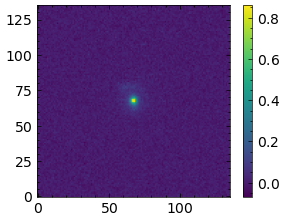

0.0009903812190083894
0.017346465572679465
1200.0


In [5]:
exp_time = this_sim_obj[0]['stack']['eff_exp_time']
image_cps = this_sim_obj[src_id]['stack']['image_map_cps']
plt.figure()
plt.imshow(image_cps, origin='lower')
plt.colorbar()
plt.show()
margin = image_cps[0:10,:]
print(np.median(margin))
print(np.std(margin))
print(exp_time)

In [6]:
import matplotlib.gridspec as gridspec
def retrive_lenses_from(lens_sample_table, SNR=20):
    survey = NewMockSurvey(config_path="./", config_file='csst_setting.yaml')
    survey.load_ideal_lens_from_table(lens_sample_table)

    imgWD = 2
    nimgs = 30
    ncols = 5
    nrows = int(nimgs/ncols)
    fig = plt.figure(figsize = (imgWD*ncols,imgWD*nrows))
    gds = gridspec.GridSpec(nrows, ncols)
    gds.update(wspace=0.0, hspace=0.0) 
    
    start_id = np.abs(lens_sample_table['SNR_stack'].data - SNR).argmin()
    start_id = start_id-int(nimgs/2)
    arc_image_list = [None]*nimgs
    noise_map_list = [None]*nimgs
    arc_snr_list = [None]*nimgs
    for j in range(nimgs):
        this_sim_obj = survey.sim_obj_from(j+start_id)
        survey.lensing_image_from(this_sim_obj)
        arc_image_list[j] = this_sim_obj[src_id]['stack']['image_map_cps'] - this_sim_obj[src_id]['stack']['lens_image_cps']
        snr_map = arc_image_list[j]/this_sim_obj[src_id]['stack']['noise_map_cps']
        arc_snr, _ = survey.sn_and_mu_from(this_sim_obj)
        arc_snr = arc_snr[0,-1]
        arc_snr_list[j] = arc_snr
        noise_map_list[j] = this_sim_obj[src_id]['stack']['noise_map_cps']
        
        axs = plt.subplot(gds[int(j/(ncols)), j%(ncols)])
        axs.imshow(snr_map, origin='lower', cmap='jet')
        axs.text(0.05, 0.9, f"Arc-SNR: {arc_snr:.2f}", transform = axs.transAxes)
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        axs.set_xticks([])
        axs.set_yticks([])
        axs.set_aspect('equal')
    plt.show()
    plt.close(fig)
    print('-'*20)

    return arc_image_list, noise_map_list, arc_snr_list, lens_sample_table[start_id:start_id+nimgs]

def log_var_bin(start=None, end=None, nbin=None):
    log_start = np.log10(start)
    log_end = np.log10(end)
    log_space = log_end - log_start
    log_step = log_space / nbin

    log_bin_left = log_start + np.arange(nbin)*log_step
    log_bin_mid = log_start + np.arange(nbin)*log_step + log_step*0.5
    log_bin_right = log_start + np.arange(nbin)*log_step + log_step

    return 10**log_bin_left, 10**log_bin_mid, 10**log_bin_right

log_var_bin(start=1, end=1000, nbin=3)

(array([  1.,  10., 100.]),
 array([  3.16227766,  31.6227766 , 316.22776602]),
 array([  10.,  100., 1000.]))

In [7]:
log_var_bin(start=20, end=1000, nbin=5)

(array([ 20.        ,  43.73448296,  95.63524998, 209.12791052,
        457.30505193]),
 array([ 29.57515273,  64.67270066, 141.42135624, 309.24949471,
        676.24333781]),
 array([  43.73448296,   95.63524998,  209.12791052,  457.30505193,
        1000.        ]))

In [19]:
survey.psf_fwhm_dict

{'g': 0.17719007049930974,
 'r': 0.17719007049930974,
 'i': 0.19031526090666598,
 'z': 0.21656564172137857,
 'stack': 0.21656564172137857}

In [24]:
psf_fwhm_stack = survey.psf_fwhm_dict['g'] + survey.psf_fwhm_dict['r'] + survey.psf_fwhm_dict['i'] + survey.psf_fwhm_dict['z']
psf_fwhm_stack /= 4
psf_kernel_stack = SSU.gauss_psf(
    npix=None, 
    dpix=survey.dpix, 
    fwhm=psf_fwhm_stack, 
    nsub=4
)

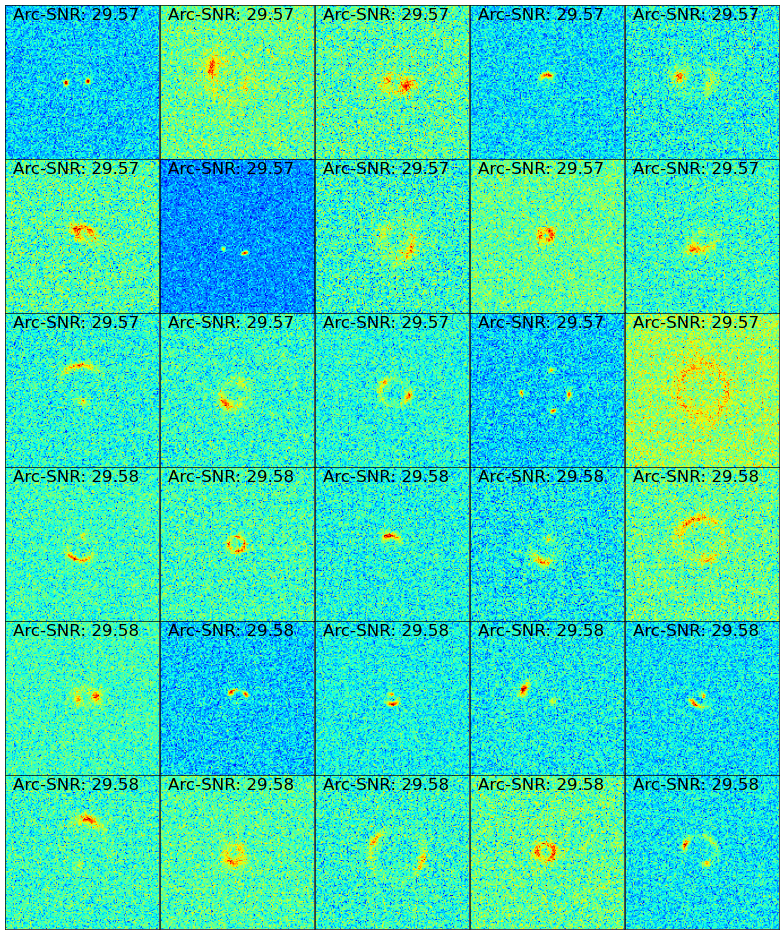

--------------------


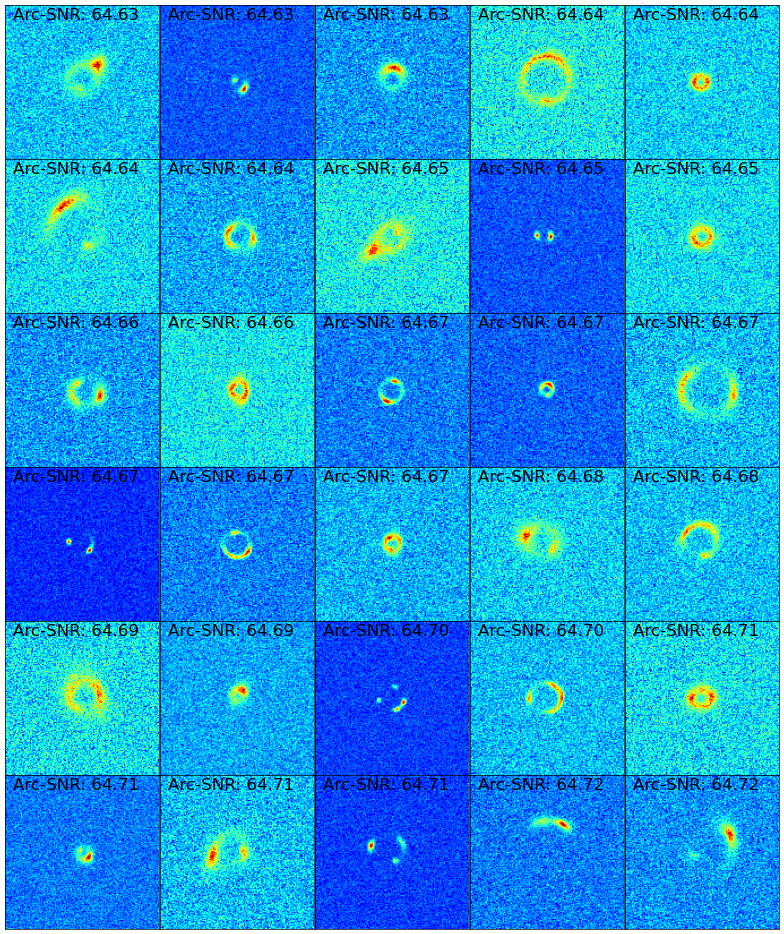

--------------------


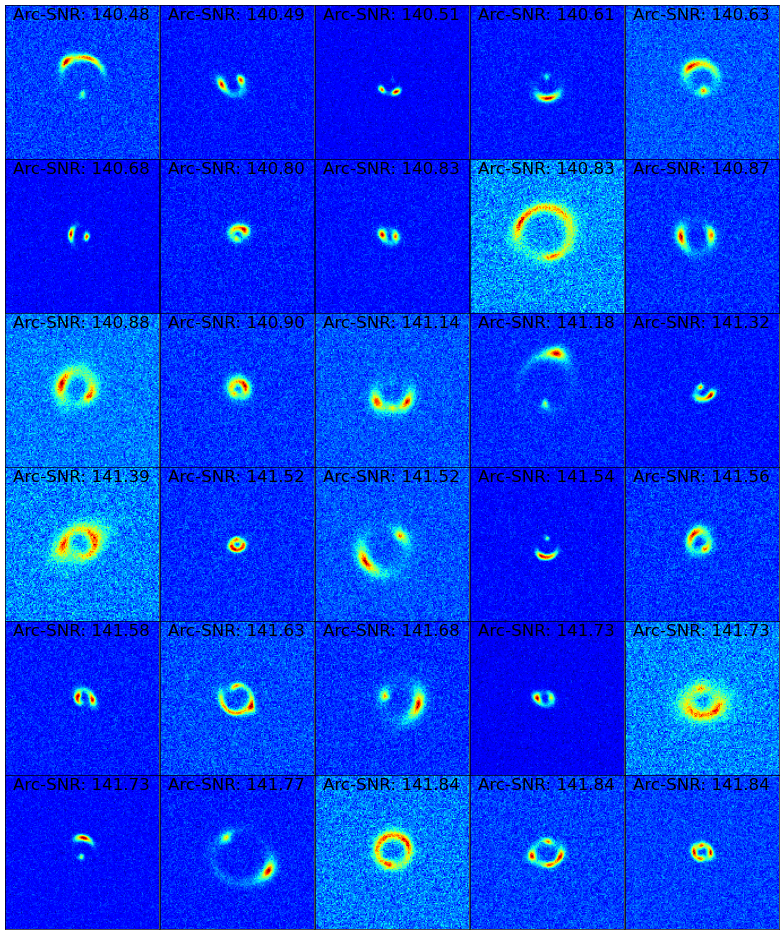

--------------------


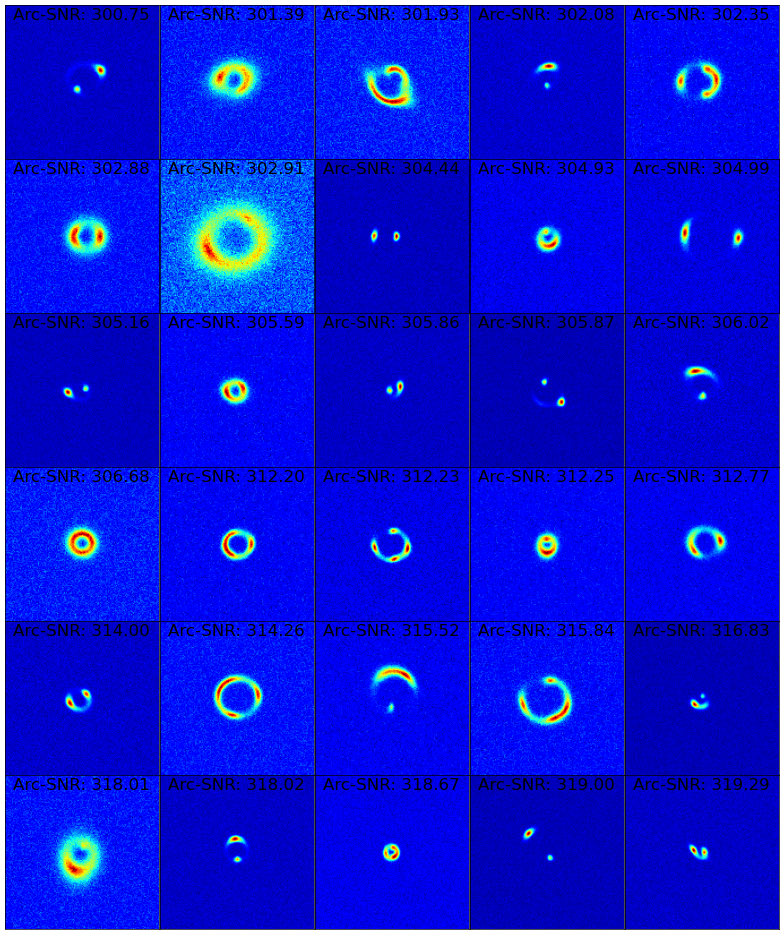

--------------------


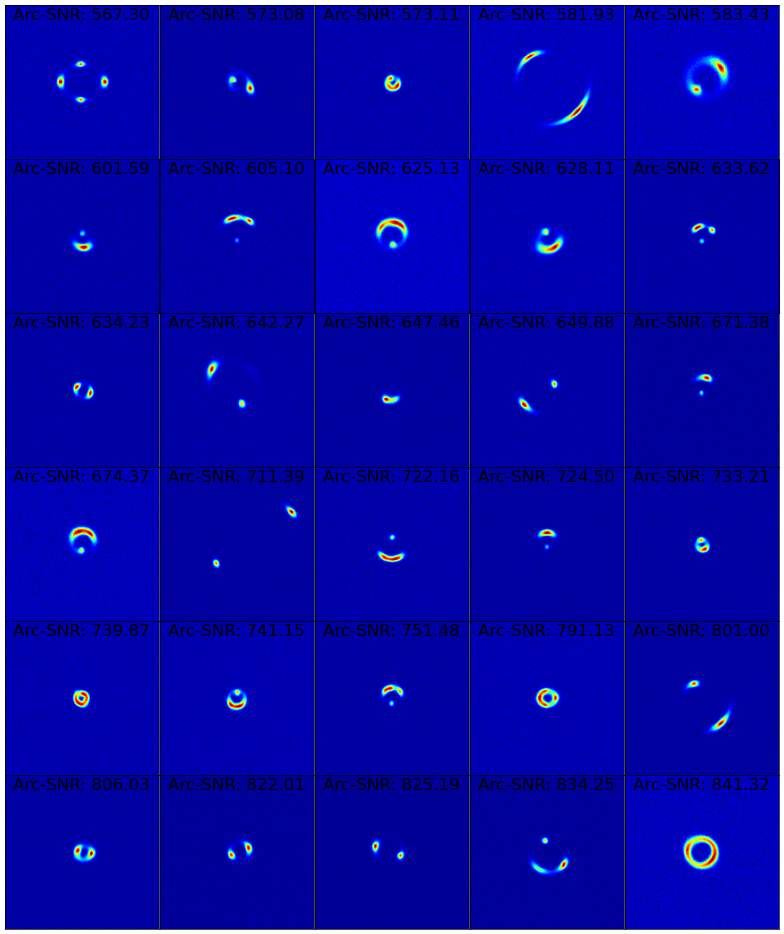

--------------------


In [28]:
import pickle
import gzip

# snr_bins = [21, 50, 100, 250, 500, 950]
snr_bins_l, snr_bins_m, snr_bins_r = log_var_bin(start=20, end=1000, nbin=5)
for this_snr in snr_bins_m:
    # this_snr = 950
    mask = stack_samples['thetaE_s0'].data > 0.3
    lens_model_samples = stack_samples[mask]
    info_list = list(retrive_lenses_from(lens_model_samples, SNR=this_snr))
    # info_list.append(survey.psf_kernel_dict['z'])
    info_list.append(psf_kernel_stack)
    
    filename = f'modeling_data/csst_image_{this_snr:.0f}.pklz'
    with gzip.open(filename, 'wb') as file:
        pickle.dump(info_list, file)

In [27]:
survey.psf_fwhm_dict

{'g': 0.17719007049930974,
 'r': 0.17719007049930974,
 'i': 0.19031526090666598,
 'z': 0.21656564172137857,
 'stack': 0.21656564172137857}

In [16]:
survey.psf_kernel_dict['z'].shape

(13, 13)